In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

trainset_forpatch = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)

testset_forpatch = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

0it [00:00, ?it/s]

170500096it [00:02, 78522423.94it/s]                               


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [0]:
for i, e in enumerate(trainset.targets):
  if e < 5:
    trainset.targets[i] = 0
  else:
    trainset.targets[i] = 1

for i, e in enumerate(testset.targets):
  if e < 5:
    testset.targets[i] = 0
  else:
    testset.targets[i] = 1
    
for i, e in enumerate(trainset_forpatch.targets):
  if e < 5:
    trainset_forpatch.targets[i] = 0
  else:
    trainset_forpatch.targets[i] = 1

for i, e in enumerate(testset_forpatch.targets):
  if e < 5:
    testset_forpatch.targets[i] = 0
  else:
    testset_forpatch.targets[i] = 1

In [0]:
trainset.data = torch.tensor(trainset.data, dtype = torch.float64)
testset.data = torch.tensor(testset.data, dtype = torch.float64)

# trainset_forpatch.data = torch.tensor(trainset_forpatch.data, dtype = torch.float64)
# testset_forpatch.data = torch.tensor(testset_forpatch.data, dtype = torch.float64)

# trainset.data = trainset.data.double()
# testset.data = testset.data.double()
# trainset_forpatch.data = trainset_forpatch.data.double()
# testset_forpatch.data = testset_forpatch.data.double()

In [0]:
# Generating MNIST_bin(alpha)

def GaussianNoise_alpha(trainset1, testset1, alpha):
  for im in range(len(trainset1)):
    trainset1.data[im] = trainset1.data[im] + torch.tensor(np.random.normal(scale = alpha, size = (32, 32, 3)), dtype = torch.float64)
  for jm in range(len(testset1)):
    testset1.data[jm] =  testset1.data[jm]   + torch.tensor(np.random.normal(scale = alpha, size = (32, 32, 3)), dtype = torch.float64)
  return trainset1, testset1

# Generating MNIST_bin_patch(alpha)

def GaussianNoise_alpha_patch(trainset1, testset1): # Feed in the data with gaussian noise already added
  for im in range(len(trainset1)):
    if trainset1.targets[im] == 0:
      for p1 in range(4):
        for p2 in range(4):
          trainset1.data[im][p1, p2] = 255
    else:
      for p1 in range(4):
        for p2 in range(24, 28):
          trainset1.data[im][p1, p2] = 255

  for im in range(len(testset1)):
    if testset1.targets[im] == 0:
      for p1 in range(4):
        for p2 in range(4):
          testset1.data[im][p1, p2] = 255
    else:
      for p1 in range(4):
        for p2 in range(24, 28):
          testset1.data[im][p1, p2] = 255
          
  return trainset1, testset1 

In [0]:
# Creating the bin data
train_bin, test_bin = GaussianNoise_alpha(trainset, testset, 0)

# Creating the bin data with patches
train_inter, test_inter = GaussianNoise_alpha(trainset_forpatch, testset_forpatch, 1)
train_bin_patch, test_bin_patch = GaussianNoise_alpha_patch(train_inter, test_inter)

TypeError: ignored

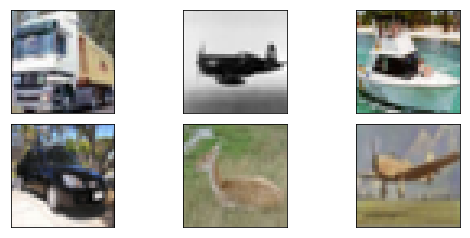

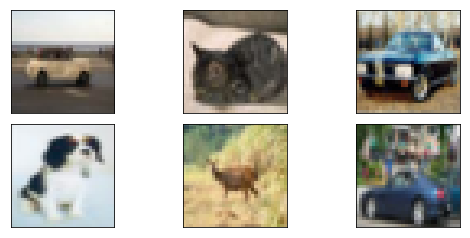

In [0]:
# Plot random train and test images
# Training images
fig, axes = plt.subplots(2, 3, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in zip([1, 115, 460, 212, 130, 10020], axes.flat):
    ax.imshow(trainset.data[i], cmap='bone')
    
# Test images without patch 
fig, axes = plt.subplots(2, 3, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in zip([201, 115, 1500, 212, 130, 122], axes.flat):
    ax.imshow(testset.data[i], cmap='bone')  
    
# fig, axes = plt.subplots(2, 3, figsize=(9, 4),
#                          subplot_kw={'xticks':[], 'yticks':[]},
#                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
# for i, ax in zip([1, 115, 460, 212, 130, 10020], axes.flat):
#     ax.imshow(train_bin_patch.data[i], cmap='bone')
    
# # Test images without patch 
# fig, axes = plt.subplots(2, 3, figsize=(9, 4),
#                          subplot_kw={'xticks':[], 'yticks':[]},
#                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
# for i, ax in zip([201, 115, 1500, 212, 130, 122], axes.flat):
#     ax.imshow(test_bin_patch.data[i], cmap='bone')      

In [0]:
# Assign data to data loader

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class linear_model(nn.Module):
  def __init__(self):
    super(linear_model, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 1)
    
  def forward(self, x):
    x = x.view(-1, 32*32*3)
    x1 = torch.sigmoid(self.fc1(x))  
    return x1
  
model = linear_model()  

In [0]:
# Define loss function and optimizer
import torch.optim as optim

loss_function = nn.BCELoss(reduction = 'mean')

optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [10]:
n_epochs = 50

for epochs in range(n_epochs):
 
  running_loss = 0
  
  for batch in trainloader:
    data, labels = batch
    
    optimizer.zero_grad()
    
    output = model(data)
    
    loss = loss_function(output, labels.view(-1, 1).float()) 
    
    loss.backward()
    
    optimizer.step()
    
    running_loss += loss.item()
  print(running_loss)    

533.7335589528084
530.1173505783081
527.1767765879631
527.2207101583481
526.7451688051224
525.2196564674377
524.5098336935043
525.779449224472
524.3197266459465
522.4094889163971
526.249917268753
521.3335404992104
522.3781735301018
523.8359942436218
521.9890676736832
522.6236956119537
520.4962065815926
522.431982934475
521.5750572681427
521.8683601617813
520.9599657654762
520.23389929533
522.3747569620609
519.2067203521729
520.4075857400894
520.8797000646591
519.7095912694931
520.1730907559395
519.8337262272835
521.2997361421585
518.8269377946854
521.6301200985909
519.1818544268608
520.0288509726524
517.623398900032
518.5308853387833
520.2241020202637
518.5423404574394
518.1486133635044
518.1038157343864
519.8244063854218
518.1933842301369
519.7474426031113
518.4623933434486
517.9505354762077
518.4908507466316
517.5526332259178
520.3308416604996
519.8920481801033
521.6724788546562


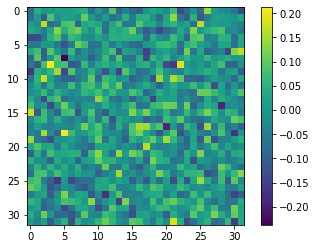

In [11]:
# Visualise the weight vector

W1 = model.fc1.weight.detach().numpy()
W1_reshape = np.reshape(W1, (32, 32, 3))[:, :, 1]
plt.imshow(W1_reshape)
plt.colorbar()
# plt.figure()

In [13]:
# Test performance on the entire test set
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = model(images)
#     _, predicted = torch.max(outputs, 1)
    predicted = outputs > 0.5
#     predicted = predicted.view(predicted.size(0))
    total += labels.size(0)
    matches = 0
    for i in range(len(predicted)):
      if predicted[i].item() == labels[i].item():
        matches += 1
    correct += matches#(predicted == labels).sum().item()
  print('Accuracy of the network on the entire data set is : %d %%' %(100 * correct/ total))

Accuracy of the network on the entire data set is : 59 %


In [0]:
## With no noise, 100% training acc. and 99% testing acc. for CIFAR
